## <font color='#1D76BA'>Integrated CA1 - Sem 2 MSc in Data Analytics<font color='#00A859'>
### <font color='#'>**Advanced Data Analytics  & Big Data Storage and Processing**
### <font color='#1ABC9C'>**Lecturer(s): David McQuaid and Muhammad Iqbal**
------
<font color='#E74C3C'>**Students Name / ID** // Rosilene Francisca da Silva - 2021090

## Business Understanding


### "Using Neural Networks and Big Data Analytics to Predict E-commerce Revenue Generation: A Look at Visitor Type Dynamics"

## Data Understanding 

Dataset: Online Shoppers Purchasing Intention Dataset
Donated on 8/30/2018

The dataset was researched on the The UCI Machine Learning Repository website: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset that CSV file was downloaded onto Python.

Dataset Information
Additional Information

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. 

Creators
C. Sakar
Yomi Kastro - DOI: 10.24432/C5F88Q

License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

Reference: 'Sakar,C. and Kastro,Yomi. (2018). Online Shoppers Purchasing Intention Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.'

### Importing the required libraries, Uploading the dataset and Preprocessing

In [1]:
#Importing the essential libraries, which are Pandas, Matplotlib, Seaborn, and Numpy.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm

%matplotlib inline

#Warnings: It can handle alert and warning messages with a number of commands and functions.
import warnings
warnings.filterwarnings('ignore')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Command to display all columns in the file.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Importing the Dataset 
shopperintents_df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
shopperintents_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
shopperintents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

There are eight categorical and ten numerical attributes in the dataset. The class label can be set to the 'Revenue' attribute.

In [6]:
shopperintents_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
shopperintents_df.shape

(12330, 18)

#### Check for missing values

In [8]:
onlinenull = shopperintents_df.isna().sum().sum()
print ('Null values in onlinedata: {}'.format(onlinenull))

Null values in onlinedata: 0


## Data Preparation

###  Exploratory Data Analysis (EDA) 
EDA entails comprehending and visualising the dataset in order to uncover patterns and insights.

#### Statistics:

Gain an understanding of the data's central tendencies and dispersion.

#### Summary statistics for numerical columns

In [9]:
shopperintents_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Summary statistics for categorical columns

In [10]:
print(shopperintents_df.describe(include='object'))

        Month        VisitorType
count   12330              12330
unique     10                  3
top       May  Returning_Visitor
freq     3364              10551


####  Visualise the distribution of numerical features to better understand their shape, spread, and the presence of outliers.

#### Histograms

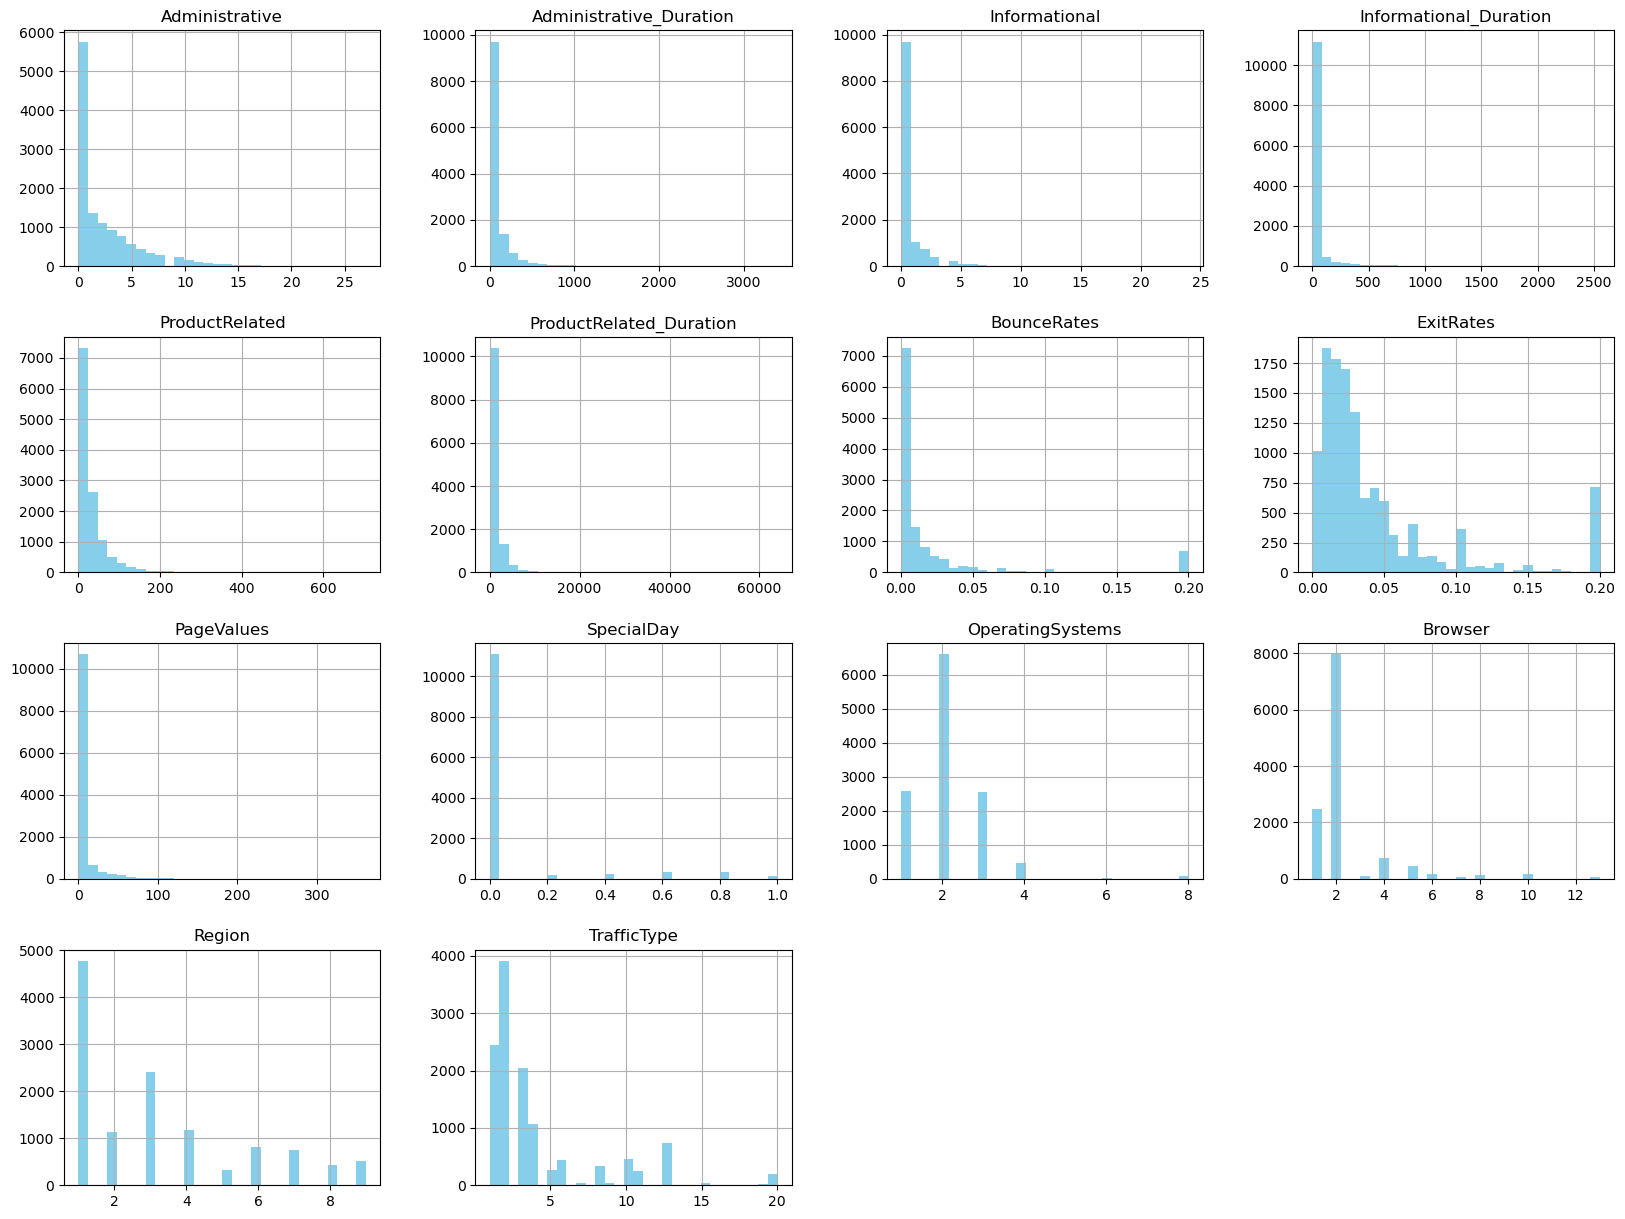

In [41]:
shopperintents_df.hist(bins=30, color = "skyblue", figsize=(20,15))
plt.show()

### Single-variable analysis

For numerical and categorical variables:

#### Categorical Features

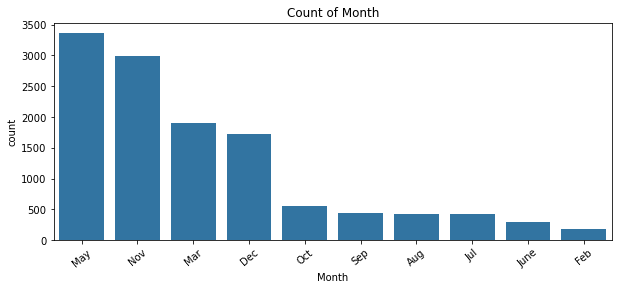

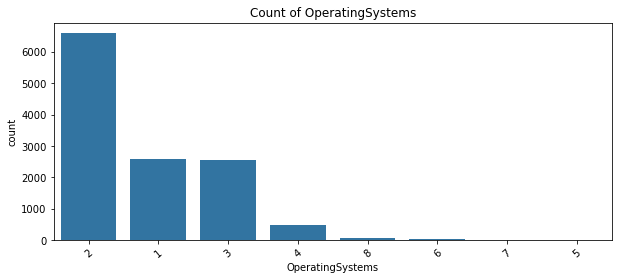

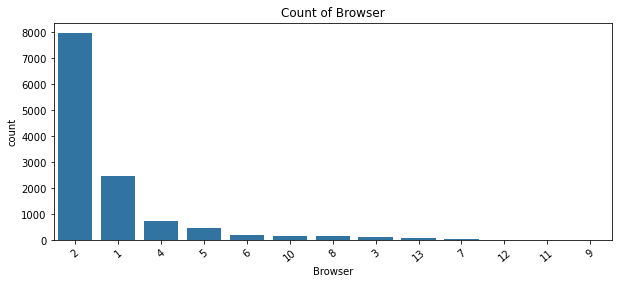

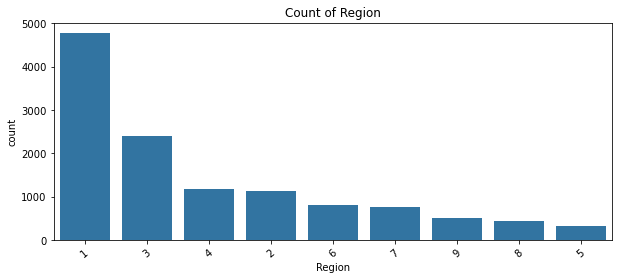

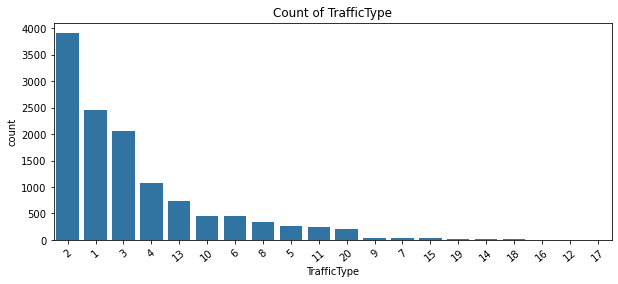

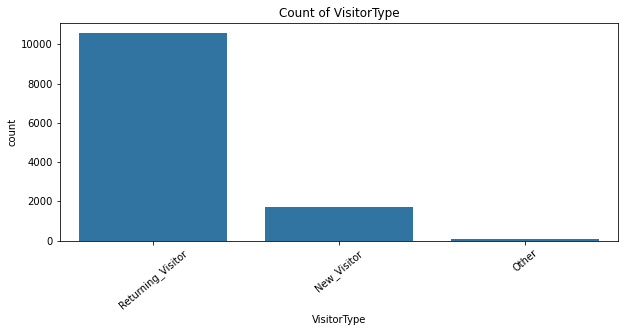

In [21]:
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=shopperintents_df[feature], order = shopperintents_df[feature].value_counts().index)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=40)
    plt.show()

#### Numeric Features

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

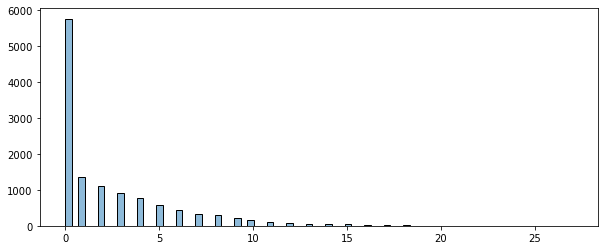

In [22]:
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
                    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(shopperintents_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

### Bivariate Analysis.

Feature versus Revenue:

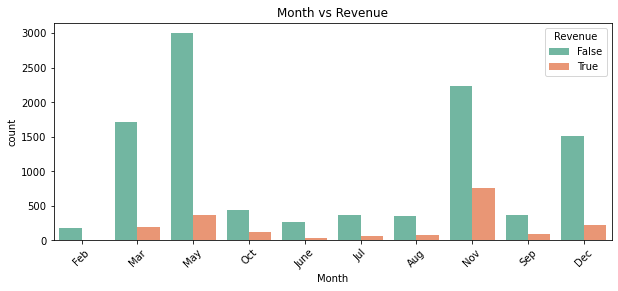

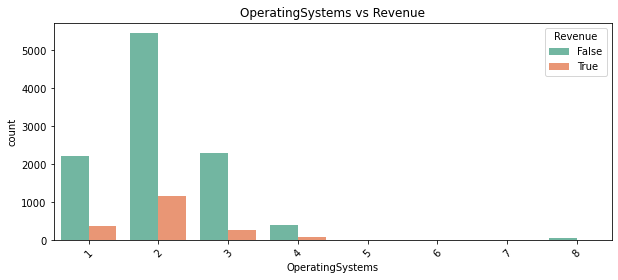

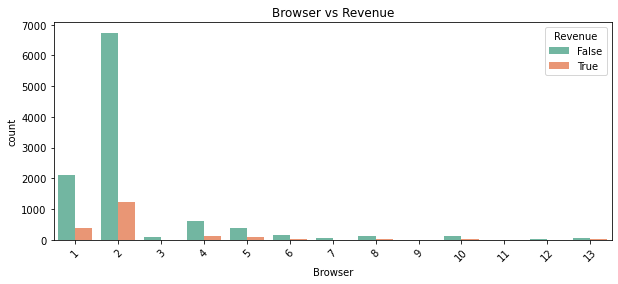

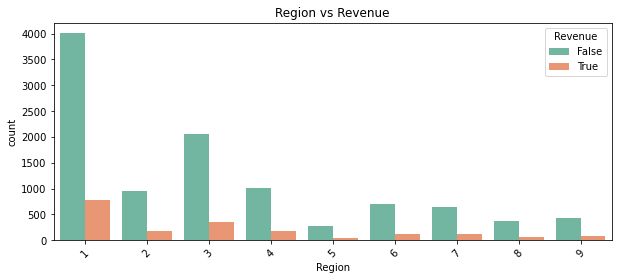

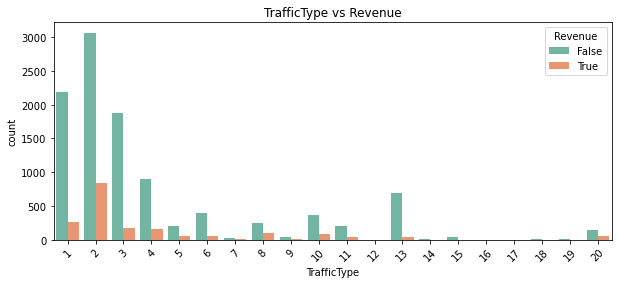

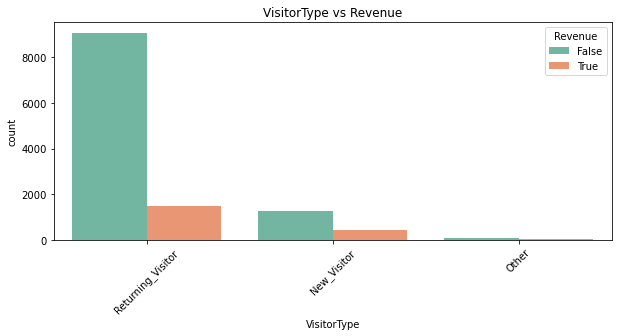

In [25]:
# Categorical features vs. Revenue
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, palette = 'Set2', hue='Revenue', data=shopperintents_df)
    plt.title(f'{feature} vs Revenue')
    plt.xticks(rotation=45)
    plt.show()

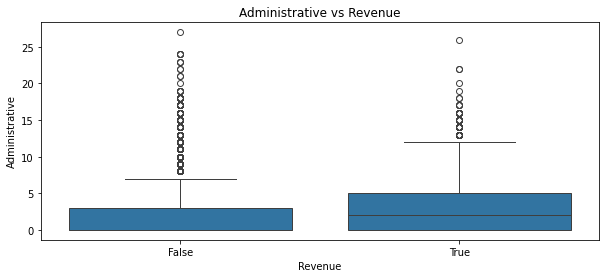

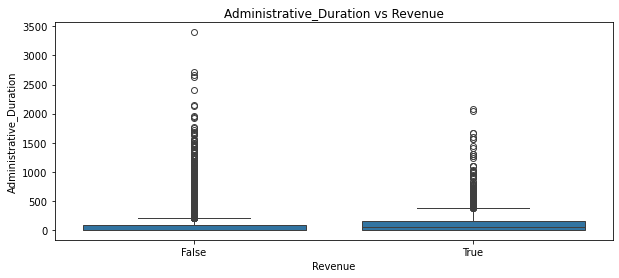

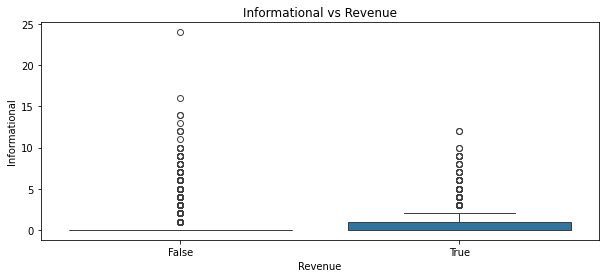

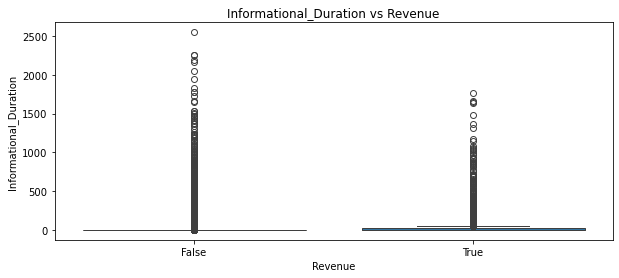

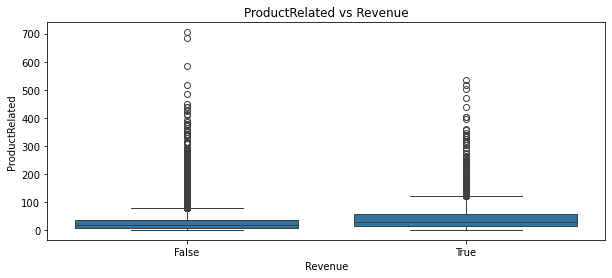

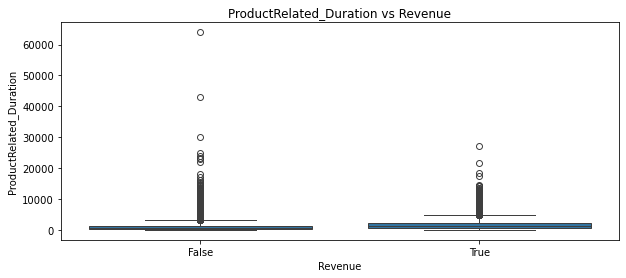

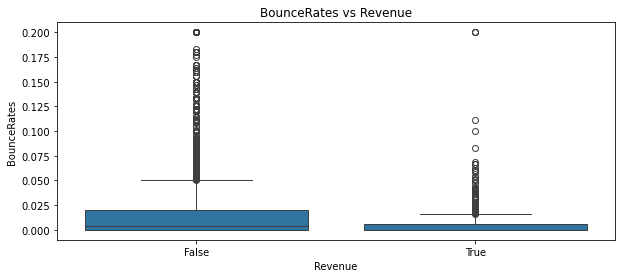

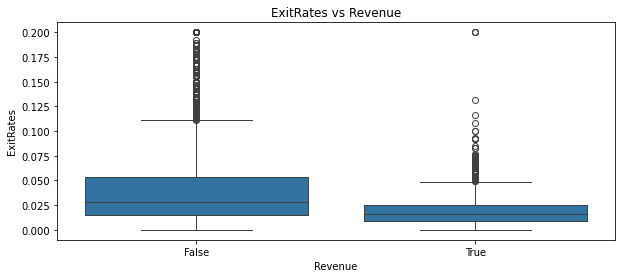

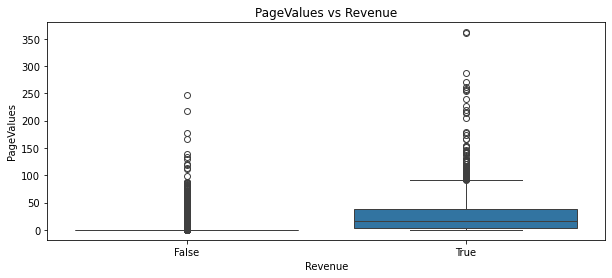

In [24]:
# Numeric features vs. Revenue
for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Revenue', y=feature, data=shopperintents_df)
    plt.title(f'{feature} vs Revenue')
    plt.show()

#### Correlation Matrix with Heatmap
Understand how numerical features relate to one another.

Select only the columns with data types int64 and float64, which should be the dataset's numerical columns, to avoid an error triggered by attempting to include categorical or non-numeric data types in the correlation calculation and calculate the correlation matrix based on these columns only. Let's plot the heatmap of the correlation matrix. 

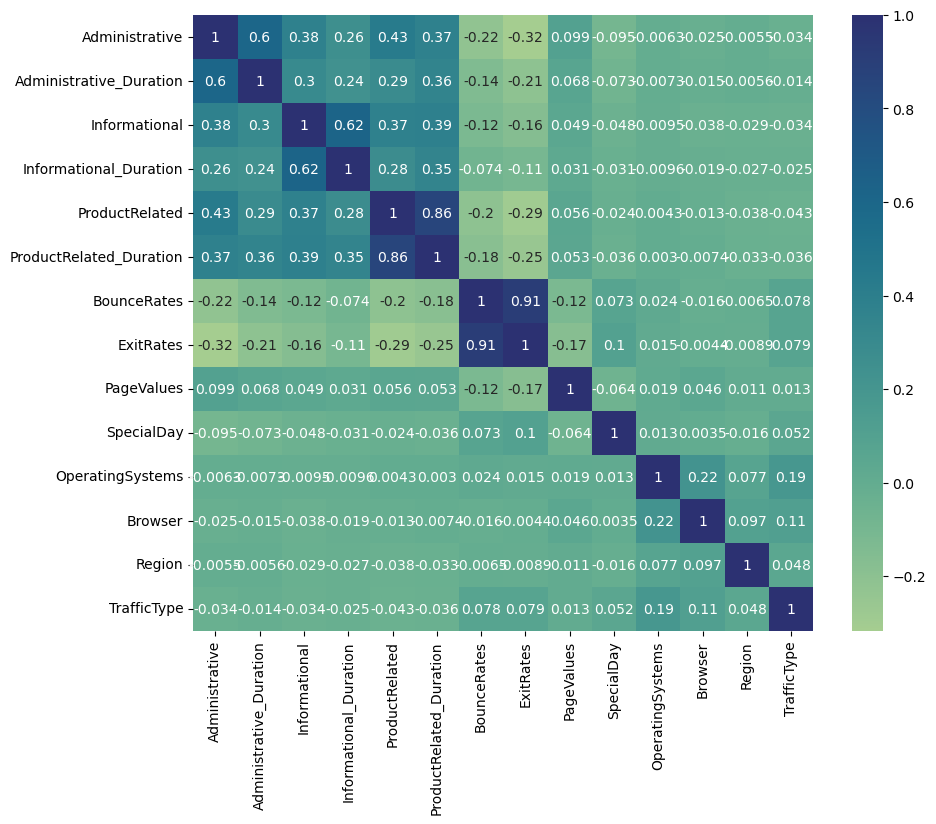

In [42]:
numerical_df = shopperintents_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="crest")
plt.show()

Correlation coefficients range from -1 to 1, with 1 indicating a perfect positive linear relationship, -1 indicating a perfect negative linear relationship, and zero indicating no linear relationship between the variables.

- Positive Correlations: Several pairs of features show moderately strong positive correlations with one another. `Administrativ` e and `Administrative_Duration`, for instance, exhibit a positive correlation, indicating that sessions with a higher number of views on administrative pages typically have longer sessions on those pages. In a similar vein, `ProductRelated` and `ProductRelated_Duration` show positive correlations with each other, meaning that the amount of time spent on each page rises with the number of page views in each category.

- Negative Correlations between `Bounce` and `Exit Rates`: It is suggested that sessions with higher levels of engagement in terms of page views and duration typically have lower bounce and exit rates. Bounce and exit rates are negatively correlated with a number of features, including `Administrative`, `Informational`, and `Product-Related` features.

- Correlation with Revenue-Generating Behaviour: Although the heatmap does not explicitly display the relationship between `revenue` and features, one would anticipate that features like `PageValues`, which indicate the page's value in relation to completed transactions, would positively correlate with revenue generation.

- Lack of Strong Correlation with Technical Features: This dataset's behavioural metrics are not strongly correlated with technical features, such as `operating systems` and `browsers`, which exhibit very low correlations with other features.

Finally, the heatmap indicates that engagement metrics, such as the number of pages visited and the duration of visits within different page categories, are linked and inversely related to bounce and exit rates.

#### Relationship Between Features and Target Variable
Investigate how various features relate to the target variable (revenue).

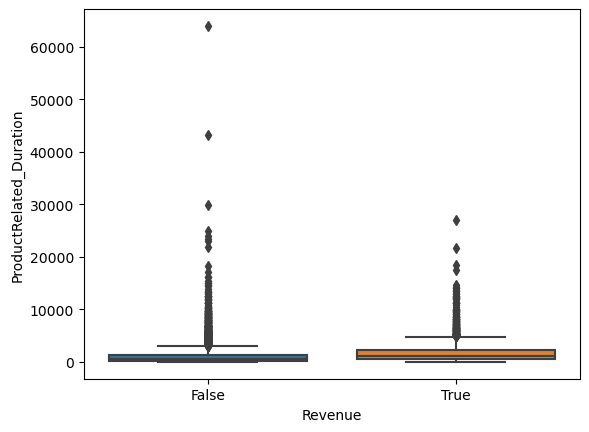

In [43]:
# Boxplot for a categorical feature against the target
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=shopperintents_df)
plt.show()

#### Bar plot for visitor types against the target

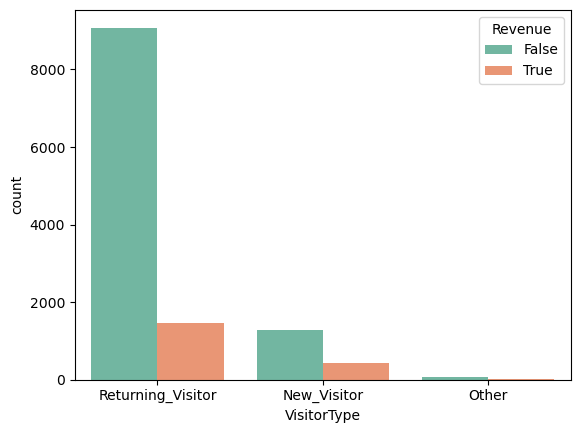

In [44]:
sns.countplot(x='VisitorType', palette = 'Set2', hue='Revenue', data=shopperintents_df)
plt.show()

#### Visitor Type Distribution 

In [64]:
shopperintents_df ['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

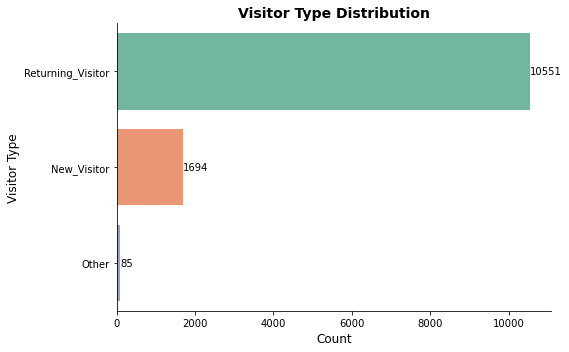

In [18]:
# Create a countplot with seaborn
plt.figure(figsize=(8, 5))
sns.countplot(data=shopperintents_df, y='VisitorType', order=shopperintents_df['VisitorType'].value_counts().index, 
              palette='Set2')
sns.despine()  # Remove the top and right spines

# Add annotations to each bar for clarity
for i, value in enumerate(shopperintents_df['VisitorType'].value_counts().values):
    plt.text(value, i, f'{value}', va='center')

# Title and labels
plt.title('Visitor Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Visitor Type', fontsize=12)
plt.tight_layout()
plt.show()

The bar chart shows the distribution of visitor types in an e-commerce dataset. It shows that the most popular category is 'Returning_Visitor', with a total of 10,551 instances, indicating a large number of users who return to the platform. In contrast, there are significantly fewer 'New_Visitors', totaling 1,694, reflecting the influx of first-time users to the website. The 'Other' category is small, with only 85 entries, implying that it is a residual category for visitors who do not fit into the standard classifications. The data visualisation reveals a significant difference in the number of returning and new visitors, emphasising the platform's visitor dynamics.

#### Check the distribution of the 'Revenue' attribute, which can be used as a class label

In [45]:
shopperintents_df ['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

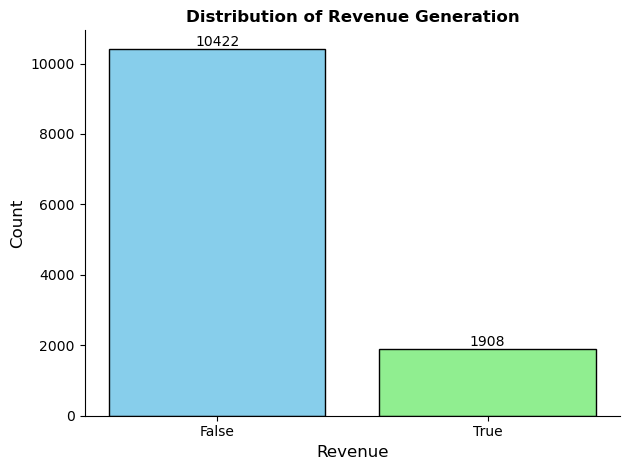

In [54]:
# Calculate the counts for the Revenue True/False
revenue_counts = shopperintents_df['Revenue'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(revenue_counts.index.astype(str), revenue_counts.values, color=['skyblue', 'lightgreen'], edgecolor='black')

# Remove unnecessary ink and chart junk
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(top=False, right=False)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')          
ax.set_title('Distribution of Revenue Generation', fontsize=12, fontweight='bold')
ax.set_xlabel('Revenue', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

The dataset is imbalanced. The graph clearly state that the dataset demonstrates a significant imbalance between the two classes. Note the exact count for each class (10,422 for 'False' and 1,908 for 'True', as indicated by the bars). 
It's represent approximately 84.53% of the instances are classified as 'False', indicating no revenue was generated and 15.47% of the instances are classified as 'True', meaning revenue was generated in these cases.

This imbalance is an important factor to consider when developing predictive models because it can affect model performance and necessitate the use of specific techniques to address data skewness. 

In [26]:
import plotly.express as px

fig = px.box(df, x='VisitorType', y='ProductRelated_Duration', color='Revenue')
fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.show()

ModuleNotFoundError: No module named 'plotly'

https://ieeexplore.ieee.org/document/10391024

#### Read the dataset in the Notebook using PySpark
To perform the analysis, read the dataset from HDFS using PySpark.  

#### Verify PySpark installation

In [20]:
!pip show pyspark

Name: pyspark
Version: 3.5.1
Summary: Apache Spark Python API
Home-page: https://github.com/apache/spark/tree/master/python
Author: Spark Developers
Author-email: dev@spark.apache.org
License: http://www.apache.org/licenses/LICENSE-2.0
Location: /home/hduser/.local/lib/python3.10/site-packages
Requires: py4j
Required-by: 


In [21]:
import sys
print(sys.executable)

/usr/bin/python3


In [2]:
import pyspark
print(pyspark.__version__)

3.5.1


In [3]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Online Shoppers Intention Analysis") \
    .getOrCreate()

# Load the dataset from HDFS
shopperintents_df = spark.read.csv('hdfs://localhost:9000/user/hduser/data/online_shoppers_intention.csv', 
                                   header=True, inferSchema=True)
shopperintents_df.show(5, truncate=False)

+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+---------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|Administrative|Administrative_Duration|Informational|Informational_Duration|ProductRelated|ProductRelated_Duration|BounceRates|ExitRates|PageValues|SpecialDay|Month|OperatingSystems|Browser|Region|TrafficType|VisitorType      |Weekend|Revenue|
+--------------+-----------------------+-------------+----------------------+--------------+-----------------------+-----------+---------+----------+----------+-----+----------------+-------+------+-----------+-----------------+-------+-------+
|0             |0.0                    |0            |0.0                   |1             |0.0                    |0.2        |0.2      |0.0       |0.0       |Feb  |1               |1      |1     |1          |Returning_Visitor|false  |false  |
|0             |0.0 

In [5]:
type(shopperintents_df)

pyspark.sql.dataframe.DataFrame

In [6]:
shopperintents_df.count()

12330

In [7]:
shopperintents_df.take(5)

[Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=1, ProductRelated_Duration=0.0, BounceRates=0.2, ExitRates=0.2, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=1, Browser=1, Region=1, TrafficType=1, VisitorType='Returning_Visitor', Weekend=False, Revenue=False),
 Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=2, ProductRelated_Duration=64.0, BounceRates=0.0, ExitRates=0.1, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=2, Browser=2, Region=1, TrafficType=2, VisitorType='Returning_Visitor', Weekend=False, Revenue=False),
 Row(Administrative=0, Administrative_Duration=0.0, Informational=0, Informational_Duration=0.0, ProductRelated=1, ProductRelated_Duration=0.0, BounceRates=0.2, ExitRates=0.2, PageValues=0.0, SpecialDay=0.0, Month='Feb', OperatingSystems=4, Browser=1, Region=9, TrafficType=3, VisitorType='Returning_Visitor', Weekend

### Preprocessing 

In [29]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame after initial loading and cleaning
scaler = StandardScaler()
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
                    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 
                    'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
shopperintents_df[numeric_features] = scaler.fit_transform(shopperintents_df[numeric_features])

#### Handling Skewed Features
Consider logarithmic scaling for features with skewed distributions, particularly Duration and PageValues, where zeros may be an issue. In such circumstances, introducing a minor constant before doing the log transformation can be beneficial.

In [32]:
import numpy as np

# Apply log transformation for skewed features
skewed_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'PageValues']
shopperintents_df[skewed_features] = shopperintents_df[skewed_features].apply(lambda x: np.log(x + 1))

### Model Selection and Training

Given the preprocessed information, a neural network can be an effective prediction model due to its ability to capture complicated nonlinear patterns and feature interactions.

#### Building a Neural Network
You may use TensorFlow and Keras to create a neural network model. Given the data's complexity and the goal at hand (binary classification), a model with numerous thick layers should suffice.

In [33]:
!pip install tensorflow
#pip install scikeras  

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 1.3 MB/s eta 0:00:002.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.6 MB/s eta 0:00:000:00:0136m0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 7.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 KB 2.5 MB/s eta 0:00:003.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 7.5 MB/

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_validate, KFold
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
model = Sequential([
    Dense(128, activation='relu', input_dim=len(numeric_features)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'Sequential' is not defined

#### Model Training

In [ ]:
X = df[numeric_features]
y = df['Revenue'] # Assuming 'Revenue' is the target variable and already encoded as 0 or 1

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=10)

### Model Evaluation

Evaluate the model's performance on the test set and make changes to the architecture or hyper-parameters based on the results.

In [ ]:
model.evaluate(X_test, y_test)